In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import ks_2samp
from scipy import stats
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:

def read_error_csv(path):

    if os.path.exists(path):
        df = pd.read_csv(path)
        return df
    return None

In [3]:
Participants_epilepsy=pd.read_csv("/neurospin/dico/data/human/epilepsy_PBS/participants.tsv", sep="\t")

In [4]:
epilepsy_controls= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="controls"]


In [5]:
def separate_epilepsy_PBS(Embeddings): #To separate the Embeddings into controls, irm_neg and irm_pos
    Embeddings = Embeddings.rename(columns={Embeddings.columns[0]: "Index"})

    Embeddings_control = Embeddings.merge(epilepsy_controls[["Index"]], on="Index", how="inner")

    return Embeddings_control

In [6]:
def remove_first_column(Embeddings):
    X= Embeddings.iloc[:,1:76]
    return X

In [7]:
def Normalisation(X1, X2, X3, X4):
    scaler = StandardScaler()
    X1 = scaler.fit_transform(X1)
    X2=scaler.transform(X2)
    X3=scaler.transform(X3)
    X4=scaler.transform(X4)

    return X1, X2, X3, X4

In [8]:
def Residualization(X1,X2,X3,X4):
    L= np.concatenate((X1,X2,X3,X4), axis=0)

    covariates = pd.DataFrame({
    'Site': ['UKB']*len(X1) 
            + ['hcp']*len(X2) 
            + ['epilepsy_PBS']*len(X3) 
            + ['PEPR']*len(X4)
    })
    covariates = pd.get_dummies(covariates)
    covariates_train= covariates.head(len(X1)+len(X2)+len(X3))
    covariates_test= covariates.tail(len(X4))

    L_train=np.concatenate((X1,X2,X3), axis=0)
    L_test= X4

    covariates = sm.add_constant(covariates)  # Add intercept

    L1_resid = np.zeros_like(L_train)
    L2_resid = np.zeros_like(L_test)

    for j in range(L_train.shape[1]):
        model = sm.OLS(L_train[:, j].astype(float), covariates_train.astype(float)).fit()
        L1_resid[:, j] = model.resid 
        L2_resid[:, j] = L_test[:,j] - model.predict(covariates_test)

    return L1_resid[:len(X1),:], L1_resid[len(X1):len(X1)+len(X2),:], L1_resid[len(X1)+len(X2):len(X1)+len(X2)+len(X3),:], L2_resid


In [9]:
def proportion_positive(L):
    n_total = len(L)
    n_pos = np.sum(L == 1)

    return n_pos / n_total

In [10]:
dir_path= "/neurospin/tmp/fred/models/2025-11-10" 

In [11]:
def PLOT(ax, nu, prop_positive_UKB, prop_positive_hcp, prop_positive_control, prop_positive_PEPR):
    ax.plot(nu, prop_positive_UKB, marker='o', linestyle='-', label="UKB")
    ax.plot(nu, prop_positive_hcp, marker='o', linestyle='-', label="hcp")
    ax.plot(nu, prop_positive_control, marker='o', linestyle='-', label="control in epilepsy_PBS")
    ax.plot(nu, prop_positive_PEPR,marker='o', linestyle='-', label="PEPR_Marseille")



In [12]:
def Calcul(nu, X1, X2, X3, X4):
    prop_positive_UKB= []
    prop_positive_hcp= []
    prop_positive_control= []
    prop_positive_neg= []

    for u in nu:
        print(u)


        clf = OneClassSVM(kernel='rbf', gamma='scale', nu=u)
        clf.fit(X1)
        y1 = clf.predict(X1)
        y2 = clf.predict(X2)
        y3 = clf.predict(X3)
        y4 = clf.predict(X4)


        prop_positive_UKB.append(proportion_positive(y1))
        prop_positive_hcp.append(proportion_positive(y2))
        prop_positive_control.append(proportion_positive(y3))
        prop_positive_neg.append(proportion_positive(y4))

        if u==nu[0]:
            t =1-proportion_positive(y4)

    return prop_positive_UKB, prop_positive_hcp, prop_positive_control, prop_positive_neg, t

In [13]:
import re

In [14]:
selected_index = np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/All the subjects/histogram_non_zero/index_to_save.npy")

0
0.02
0.04
0.06
0.08
0.1
1
0.02
0.04
0.06
0.08
0.1
2
0.02
0.04
0.06
0.08
0.1
3
0.02
0.04
0.06
0.08
0.1
4
0.02
0.04
0.06
0.08
0.1
5
0.02
0.04
0.06
0.08
0.1
6
0.02
0.04
0.06
0.08
0.1
7
0.02
0.04
0.06
0.08
0.1
8
0.02
0.04
0.06
0.08
0.1
9
0.02
0.04
0.06
0.08
0.1
10
0.02
0.04
0.06
0.08
0.1
11
0.02
0.04
0.06
0.08
0.1
12
0.02
0.04
0.06
0.08
0.1
13
0.02
0.04
0.06
0.08
0.1
14
0.02
0.04
0.06
0.08
0.1
15
0.02
0.04
0.06
0.08
0.1
16
0.02
0.04
0.06
0.08
0.1
17
0.02
0.04
0.06
0.08
0.1
18
0.02
0.04
0.06
0.08
0.1
19
0.02
0.04
0.06
0.08
0.1
20
0.02
0.04
0.06
0.08
0.1
21
0.02
0.04
0.06
0.08
0.1
22
0.02
0.04
0.06
0.08
0.1
23
0.02
0.04
0.06
0.08
0.1
24
0.02
0.04
0.06
0.08
0.1
25
0.02
0.04
0.06
0.08
0.1
26
0.02
0.04
0.06
0.08
0.1
27
0.02
0.04
0.06
0.08
0.1
28
0.02
0.04
0.06
0.08
0.1
29
0.02
0.04
0.06
0.08
0.1
30
0.02
0.04
0.06
0.08
0.1
31
0.02
0.04
0.06
0.08
0.1
32
0.02
0.04
0.06
0.08
0.1
33
0.02
0.04
0.06
0.08
0.1
34
0.02
0.04
0.06
0.08
0.1
35
0.02
0.04
0.06
0.08
0.1
36
0.02
0.04
0.06
0.08
0.1
37
0.02
0.0

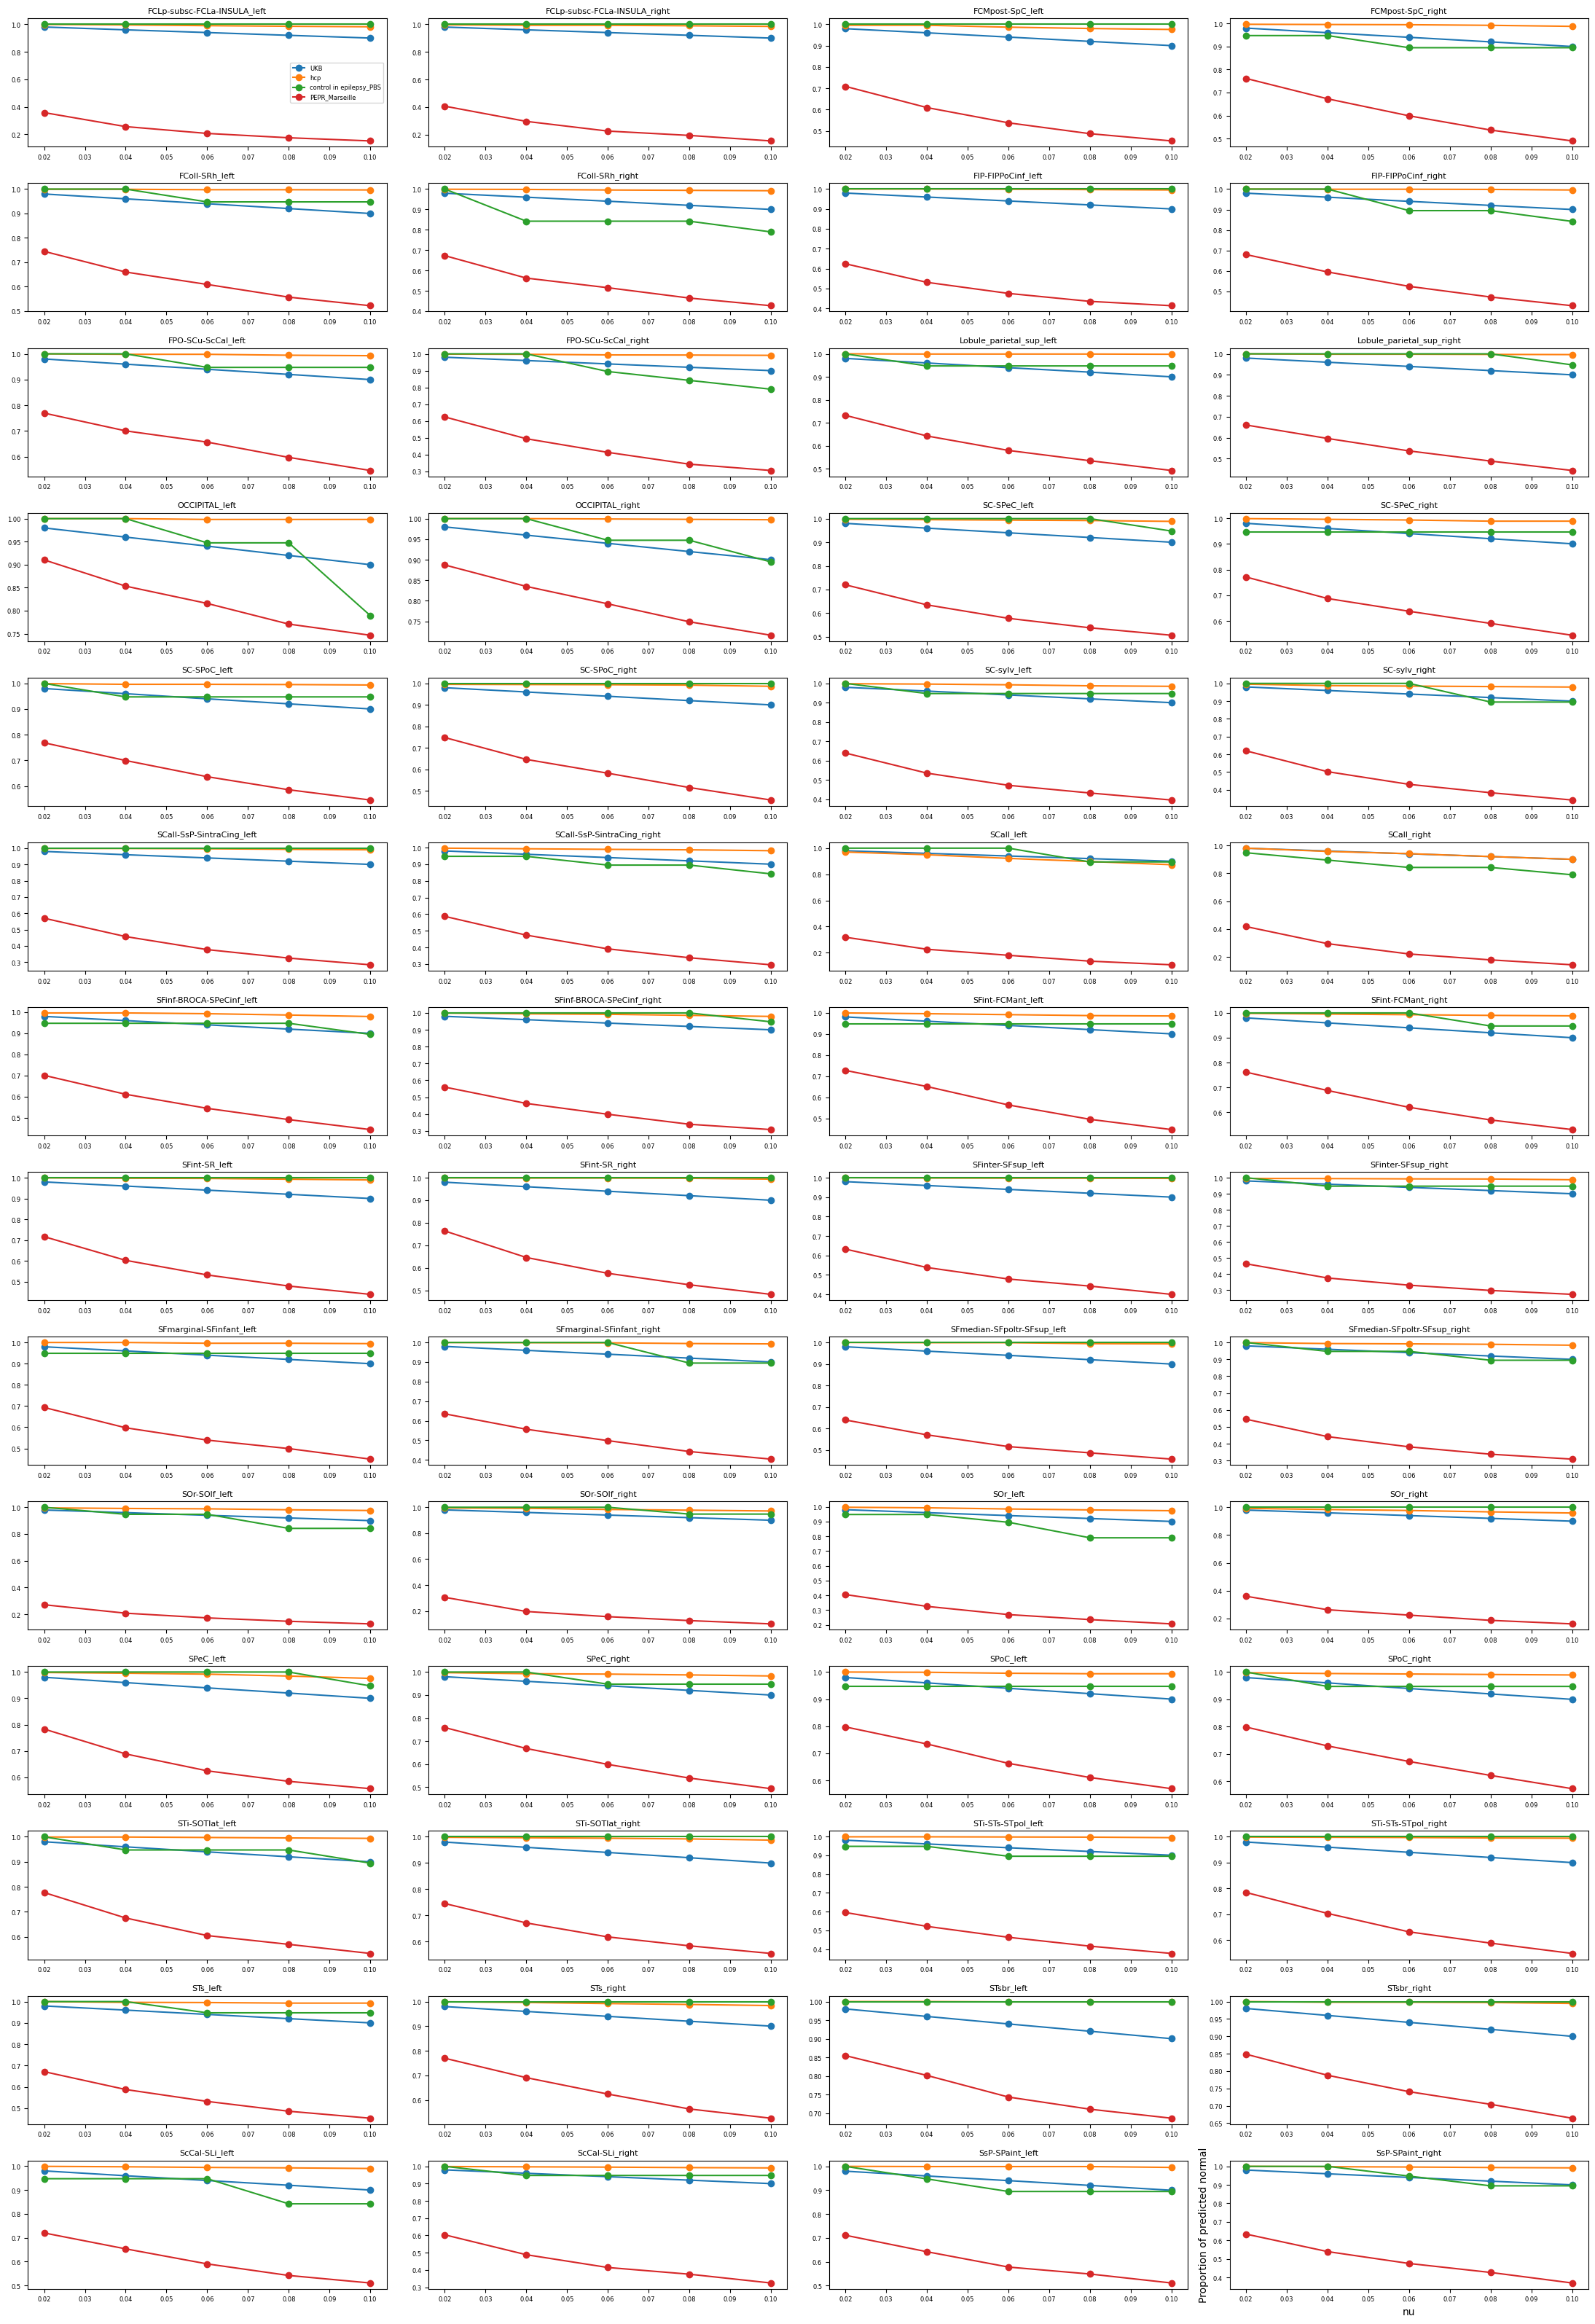

In [15]:

subfolders = sorted([
    f for f in os.listdir(dir_path)
    if os.path.isdir(os.path.join(dir_path, f))
])


rows, cols = 14, 4
total_plots = rows * cols

fig, axes = plt.subplots(rows, cols, figsize=(22, 32))
axes = axes.flatten()

ks_table =pd.DataFrame(columns=["region", "Proportion of predicted abnormal on PEPR_Marseille"])
nu = np.arange(0.02,0.11,0.02)
for i, folder in enumerate(subfolders):
    print(i)
    regions=re.match(r"(.*?(left|right))", folder).group(1)

    ax = axes[i]
    current_path = os.path.join(dir_path, folder)

    ukb_file = os.path.join(current_path, "Embeddings.csv")
    hcp_file = os.path.join(current_path, "hcp", "Embeddings.csv")
    epi_file = os.path.join(current_path, "epilepsy_PBS", "Embeddings.csv")
    PEPR_file= os.path.join(current_path, "PEPR_Marseille","Embeddings.csv")


    # lecture
    Embeddings_ukb = read_error_csv(ukb_file)
    Embeddings_hcp = read_error_csv(hcp_file)
    Embeddings_epilepsy = read_error_csv(epi_file)
    Embeddings_PEPR = read_error_csv(PEPR_file)
    
    Embeddings_PEPR= Embeddings_PEPR.loc[selected_index]

    Embeddings_control= separate_epilepsy_PBS(Embeddings_epilepsy)

    X1= remove_first_column(Embeddings_ukb)
    X2= remove_first_column(Embeddings_hcp)
    X3= remove_first_column(Embeddings_control)
    X4= remove_first_column(Embeddings_PEPR)

    X1, X2, X3, X4= Normalisation(X1, X2, X3, X4)
    X1, X2, X3, X4= Residualization(X1, X2, X3, X4)

    
    prop_positive_UKB, prop_positive_hcp, prop_positive_control, prop_positive_neg,t= Calcul(nu,X1, X2, X3, X4)

    PLOT(ax, nu, prop_positive_UKB, prop_positive_hcp, prop_positive_control, prop_positive_neg)

    ax.set_title(regions, fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    if i == 0:
        ax.legend(fontsize=6)
        plt.xlabel("nu")
        plt.ylabel("Proportion of predicted normal")
    ks_table.loc[i] = [regions, t]
plt.tight_layout()
plt.show()



In [16]:
names= ks_table.iloc[:,0]

value = ks_table.iloc[:, 1]

In [17]:
visualize_distance= pd.DataFrame({ "region": names,
                                  "p": value})

In [18]:
visualize_distance["p"]

0     0.642424
1     0.593939
2     0.290909
3     0.238788
4     0.255758
5     0.327273
6     0.375758
7     0.320000
8     0.230303
9     0.375758
10    0.267879
11    0.339394
12    0.089697
13    0.112727
14    0.280000
15    0.229091
16    0.231515
17    0.252121
18    0.361212
19    0.380606
20    0.430303
21    0.413333
22    0.681212
23    0.581818
24    0.299394
25    0.440000
26    0.272727
27    0.238788
28    0.283636
29    0.236364
30    0.367273
31    0.535758
32    0.306667
33    0.364848
34    0.360000
35    0.454545
36    0.728485
37    0.694545
38    0.595152
39    0.640000
40    0.216970
41    0.241212
42    0.202424
43    0.201212
44    0.223030
45    0.254545
46    0.404848
47    0.215758
48    0.328485
49    0.230303
50    0.145455
51    0.151515
52    0.280000
53    0.396364
54    0.288485
55    0.366061
Name: p, dtype: float64

In [19]:
sorted_distance = visualize_distance.sort_values(by="p", ascending=False)

In [20]:
sorted_distance.to_csv("Residualization_Proportion_abnormal_on_PEPR")

Calcul du score d'anomalies par régions

In [21]:
def Calcul_score(X1, X2, X3, X4, nu=0.02):



    clf = OneClassSVM(kernel='rbf', gamma='scale', nu=nu)
    clf.fit(X1)
    score1 = clf.decision_function(X1)
    score2 = clf.decision_function(X2)
    score3 = clf.decision_function(X3)
    score4 = clf.decision_function(X4)


    return -np.mean(score1), -np.mean(score2), -np.mean(score3), -np.mean(score4)

In [22]:
import re


In [23]:

subfolders = sorted([
    f for f in os.listdir(dir_path)
    if os.path.isdir(os.path.join(dir_path, f))
])



df_UKB =pd.DataFrame(columns=["region", "score"])
df_hcp =pd.DataFrame(columns=["region", "score"])
df_control =pd.DataFrame(columns=["region", "score"])
df_PEPR =pd.DataFrame(columns=["region", "score"])

for i, folder in enumerate(subfolders):
    print(i)
    regions=re.match(r"(.*?(left|right))", folder).group(1)

    current_path = os.path.join(dir_path, folder)

    ukb_file = os.path.join(current_path, "Embeddings.csv")
    hcp_file = os.path.join(current_path, "hcp", "Embeddings.csv")
    epi_file = os.path.join(current_path, "epilepsy_PBS", "Embeddings.csv")
    PEPR_file= os.path.join(current_path, "PEPR_Marseille","Embeddings.csv")


    # lecture
    Embeddings_ukb = read_error_csv(ukb_file)
    Embeddings_hcp = read_error_csv(hcp_file)
    Embeddings_epilepsy = read_error_csv(epi_file)
    Embeddings_PEPR = read_error_csv(PEPR_file)

    Embeddings_PEPR= Embeddings_PEPR.loc[selected_index]
    Embeddings_control= separate_epilepsy_PBS(Embeddings_epilepsy)

    X1= remove_first_column(Embeddings_ukb)
    X2= remove_first_column(Embeddings_hcp)
    X3= remove_first_column(Embeddings_control)
    X4= remove_first_column(Embeddings_PEPR)

    X1, X2, X3, X4= Normalisation(X1, X2, X3, X4)
    X1, X2, X3, X4= Residualization(X1, X2, X3, X4)

    
    score_UKB, score_hcp, score_control, score_PEPR = Calcul_score(X1, X2, X3, X4)

    df_UKB.loc[i] = [regions, score_UKB]
    df_hcp.loc[i] = [regions, score_hcp]
    df_control.loc[i] = [regions, score_control]
    df_PEPR.loc[i] = [regions, score_PEPR]



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


In [24]:
df_UKB.to_csv("Residualization_UKB_anomaly_score")
df_hcp.to_csv("Residualization_hcp_anomaly_score")
df_control.to_csv("Residualization_control_anomaly_score")
df_PEPR.to_csv("Residualization_PEPR_anomaly_score")


On veut aussi connaitre les scores d'anomalies pour les patients irm_neg et irm_pos de epilepsy_PBS

In [39]:
epilepsy_neg= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_negatives_centrales"]
epilepsy_pos= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_positives_centrales"]


In [40]:
def separate2(Embeddings): #To separate the Embeddings into controls, irm_neg and irm_pos
    Embeddings = Embeddings.rename(columns={Embeddings.columns[0]: "Index"})

    Embeddings_neg = Embeddings.merge(epilepsy_neg[["Index"]], on="Index", how="inner")
    Embeddings_pos = Embeddings.merge(epilepsy_pos[["Index"]], on="Index", how="inner")

    return Embeddings_neg, Embeddings_pos

In [41]:
def Normalisation2(X1, X2, X3, X4, X5, X6):
    scaler = StandardScaler()
    X1 = scaler.fit_transform(X1)
    X2=scaler.transform(X2)
    X3=scaler.transform(X3)
    X4=scaler.transform(X4)
    X5=scaler.transform(X5)
    X6=scaler.transform(X6)

    return X1, X2, X3, X4, X5, X6

In [42]:
def Residualization2(X1,X2,X3,X4, X5, X6):
    L= np.concatenate((X1,X2,X3,X4), axis=0)

    covariates = pd.DataFrame({
    'Site': ['UKB']*len(X1) 
            + ['hcp']*len(X2) 
            + ['epilepsy_PBS']*len(X3) 
            + ['PEPR']*len(X4)
            +['epilepsy_PBS']*len(X5)
            +['epilepsy_PBS']*len(X6)
    })
    covariates = pd.get_dummies(covariates)
    covariates_train= covariates.head(len(X1)+len(X2)+len(X3))
    covariates_test= covariates.tail(len(X5)+len(X6))

    L_train=np.concatenate((X1,X2,X3), axis=0)
    L_test= np.concatenate((X5,X6), axis=0)

    covariates = sm.add_constant(covariates)  # Add intercept

    L1_resid = np.zeros_like(L_train)
    L2_resid = np.zeros_like(L_test)

    for j in range(L_train.shape[1]):
        model = sm.OLS(L_train[:, j].astype(float), covariates_train.astype(float)).fit()
        L1_resid[:, j] = model.resid 
        L2_resid[:, j] = L_test[:,j] - model.predict(covariates_test)

    return L1_resid[:len(X1),:], L2_resid[:len(X5),:], L2_resid[len(X5):,:]


In [43]:
def Calcul_score2(X1, X5, X6, nu=0.02):

    clf = OneClassSVM(kernel='rbf', gamma='scale', nu=nu)
    clf.fit(X1)
    score1 = clf.decision_function(X1)
    score5 = clf.decision_function(X5)
    score6 = clf.decision_function(X6)

    return -np.mean(score5), -np.mean(score6)

In [44]:

subfolders = sorted([
    f for f in os.listdir(dir_path)
    if os.path.isdir(os.path.join(dir_path, f))
])

df_neg =pd.DataFrame(columns=["region", "p"])
df_pos =pd.DataFrame(columns=["region", "p"])

for i, folder in enumerate(subfolders):
    print(i)
    regions=re.match(r"(.*?(left|right))", folder).group(1)

    current_path = os.path.join(dir_path, folder)

    ukb_file = os.path.join(current_path, "Embeddings.csv")
    hcp_file = os.path.join(current_path, "hcp", "Embeddings.csv")
    epi_file = os.path.join(current_path, "epilepsy_PBS", "Embeddings.csv")
    PEPR_file= os.path.join(current_path, "PEPR_Marseille","Embeddings.csv")


    # lecture
    Embeddings_ukb = read_error_csv(ukb_file)
    Embeddings_hcp = read_error_csv(hcp_file)
    Embeddings_epilepsy = read_error_csv(epi_file)
    Embeddings_PEPR = read_error_csv(PEPR_file)

    Embeddings_PEPR= Embeddings_PEPR.loc[selected_index]
    Embeddings_control= separate_epilepsy_PBS(Embeddings_epilepsy)
    Embeddings_neg, Embeddings_pos = separate2(Embeddings_epilepsy)

    X1= remove_first_column(Embeddings_ukb)
    X2= remove_first_column(Embeddings_hcp)
    X3= remove_first_column(Embeddings_control)
    X4= remove_first_column(Embeddings_PEPR)
    X5= remove_first_column(Embeddings_neg)
    X6= remove_first_column(Embeddings_pos)

    X1, X2, X3, X4, X5, X6= Normalisation2(X1, X2, X3, X4, X5, X6)
    X1, X5, X6 = Residualization2(X1, X2, X3, X4, X5, X6)

    
    score_neg, score_pos = Calcul_score2(X1, X5, X6)

    df_neg.loc[i] = [regions, score_neg]
    df_pos.loc[i] = [regions, score_pos]



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


In [45]:
df_neg.to_csv("Residualization_irm_neg_anomaly_score")
df_pos.to_csv("Residualization_irm_pos_anomaly_score")
